1. Window design method
2. Frequency sampling method
3. Least MSE (mean square error) method
4. Parks–McClellan method
5. Equiripple FIR filters 

In [1]:
import math
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
n = 101
center = round((n-1)/2)
fc = 0.2
f_band = 0.1

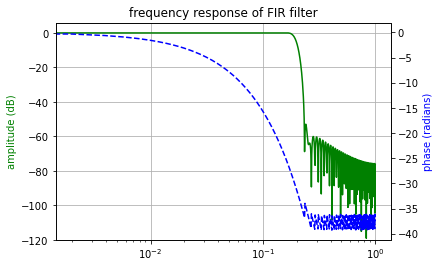

In [3]:
taps = signal.firwin(n, cutoff = fc, window = "hamming")

w, h = signal.freqz(taps)

amplitude = 20 * np.log10(abs(h))
angle = np.unwrap(np.angle(h))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('frequency response of FIR filter')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

ax1.plot(w/max(w), amplitude, 'g')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.set_ylim(-120, 6)
ax1.grid()

ax2.plot(w/max(w), angle, 'b--')
ax2.set_ylabel('phase (radians)', color='b')

plt.xscale("log")
plt.show()

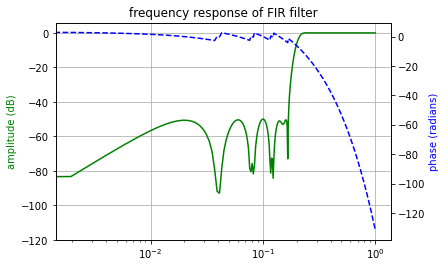

In [4]:
taps = -signal.firwin(n, cutoff = fc, window = "hamming")
taps[center] = taps[center] + 1

w, h = signal.freqz(taps)

amplitude = 20 * np.log10(abs(h))
angle = np.unwrap(np.angle(h))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('frequency response of FIR filter')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

ax1.plot(w/max(w), amplitude, 'g')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.set_ylim(-120, 6)
ax1.grid()

ax2.plot(w/max(w), angle, 'b--')
ax2.set_ylabel('phase (radians)', color='b')

plt.xscale("log")
plt.show()

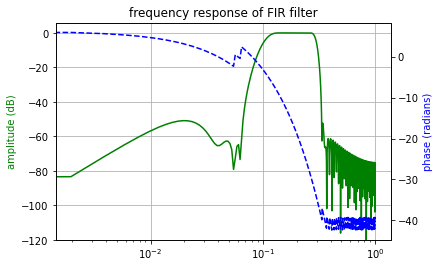

In [5]:
lp_taps = signal.firwin(n, cutoff = fc - f_band, window = 'hamming')

hp_taps = -signal.firwin(n, cutoff = fc + f_band, window = 'hamming')
hp_taps[center] = hp_taps[center] + 1

band_padd = -(lp_taps + hp_taps)
band_padd[center] = band_padd[center] + 1

w, h = signal.freqz(band_padd)

amplitude = 20 * np.log10(abs(h))
angle = np.unwrap(np.angle(h))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('frequency response of FIR filter')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

ax1.plot(w/max(w), amplitude, 'g')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.set_ylim(-120, 6)
ax1.grid()

ax2.plot(w/max(w), angle, 'b--')
ax2.set_ylabel('phase (radians)', color='b')

plt.xscale("log")
plt.show()

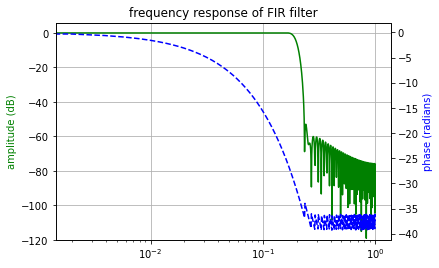

In [6]:
# This method is equivalent to firwin
center = round((n-1)/2)
t = np.linspace(-center, center, n)
taps = fc * np.sinc(t * fc) * signal.windows.hamming(n)

w, h = signal.freqz(taps)

amplitude = 20 * np.log10(abs(h))
angle = np.unwrap(np.angle(h))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('frequency response of FIR filter')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

ax1.plot(w/max(w), amplitude, 'g')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.set_ylim(-120, 6)
ax1.grid()

ax2.plot(w/max(w), angle, 'b--')
ax2.set_ylabel('phase (radians)', color='b')

plt.xscale("log")
plt.show()